<a href="https://colab.research.google.com/github/lizbeth-cortes/Data_science/blob/main/M2_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(style="white")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/Datasets/athlete_olympic_events-clean.csv", index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


[Text(0.5, 1.0, 'Edades de atletas que participaron en juegos olímpicos'),
 Text(0.5, 0, 'edad'),
 Text(0, 0.5, 'conteo')]

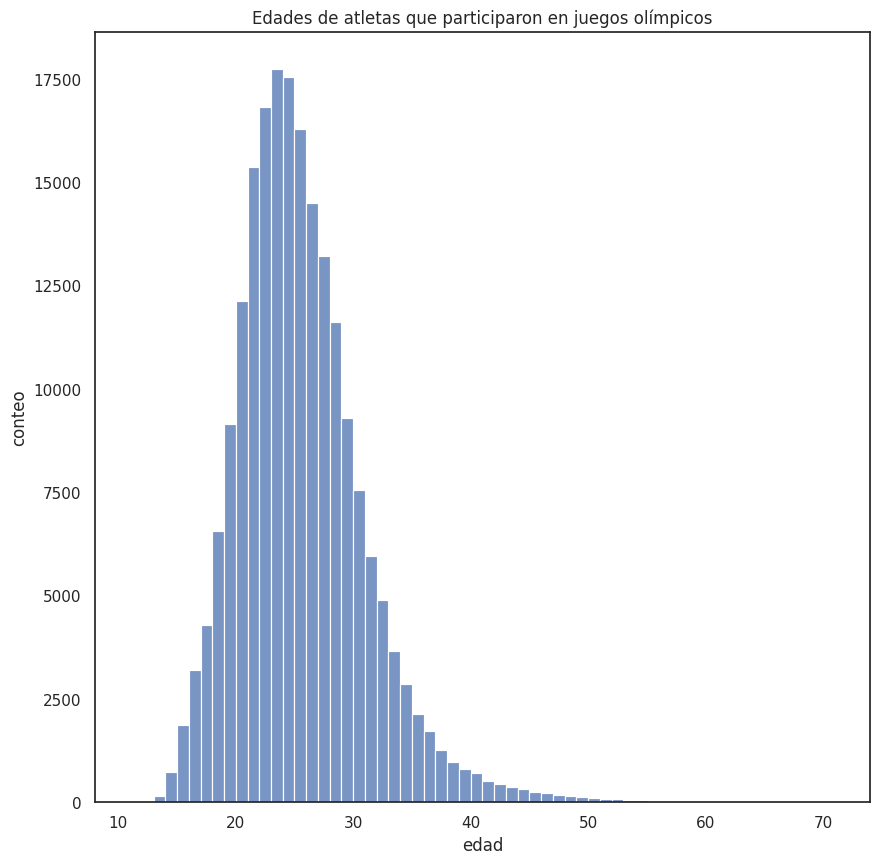

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = sns.histplot(df['age'], bins=60)
ax.set(title="Edades de atletas que participaron en juegos olímpicos", xlabel="edad", ylabel="conteo")

In [ ]:
df['age'].max() - df['age'].min()

60.0

In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
gender = df.groupby(level=0)[['sex']].last()
merged = by_athlete.merge(gender, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

females.head()

,age,height,weight
athlete_id,,,
5,24.333333,185.0,82.0
13,32.000000,159.0,55.5
14,32.000000,171.0,65.0
22,22.000000,170.0,125.0
26,17.000000,169.0,65.0


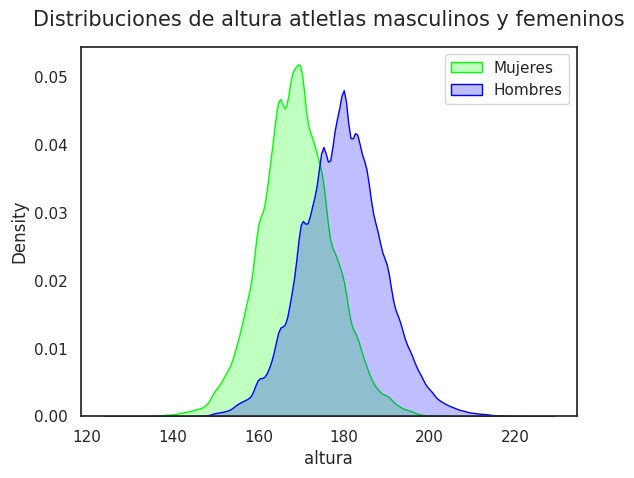

In [ ]:
ax = sns.kdeplot(females['height'], label="Mujeres", fill=True, color="#")
sns.kdeplot(males['height'], label="Hombres", ax=ax, fill=True, color="#")
ax.set_title("Distribuciones de altura atletlas masculinos y femeninos", size=15, pad=15)
ax.set(xlabel="altura")
ax.legend(loc="upper right")

## Ejemplo 02
Gráficas de barras

In [ ]:
df = pd.read_json("/content/drive/MyDrive/Bedu/Remoto Datasets/Remoto zomato_reviews-clean.json")
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
df['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [ ]:
df['user_rating'].nunique()

6

In [ ]:
df['user_rating'].value_counts()

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

[Text(0, 0.5, 'count')]

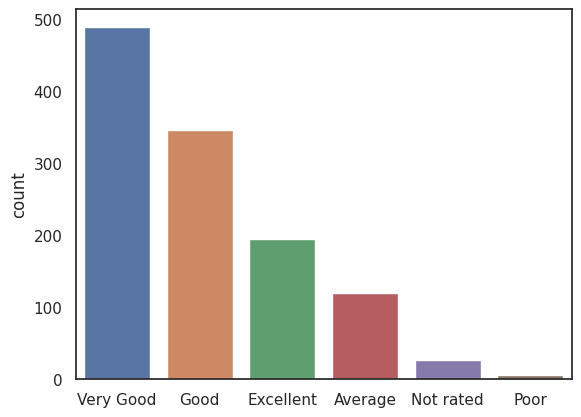

In [ ]:
counts = df['user_rating'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set(ylabel="count")

[Text(0, 0.5, 'porcentaje')]

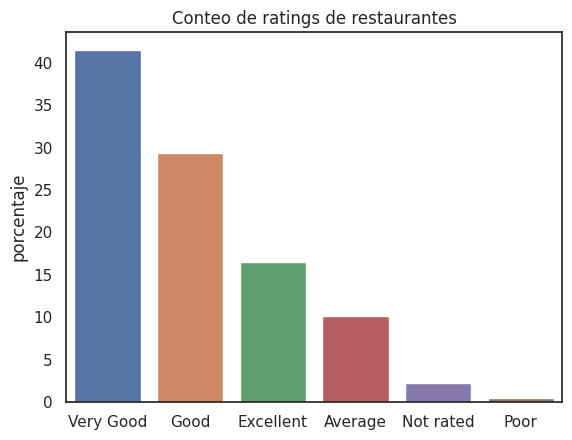

In [ ]:
as_percentages = counts * 100 / counts.sum()
ax = sns.barplot(x=as_percentages.index, y=as_percentages)
ax.set_title("Conteo de ratings de restaurantes")
ax.set(ylabel="porcentaje")

[Text(0, 0, 'Very Good'),
 Text(1, 0, 'Good'),
 Text(2, 0, 'Excellent'),
 Text(3, 0, 'Average'),
 Text(4, 0, 'Not rated'),
 Text(5, 0, 'Poor')]

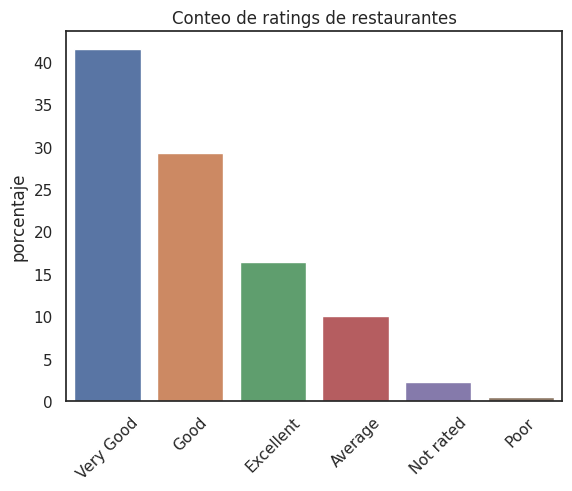

In [ ]:
as_percentages = counts * 100 / counts.sum()
ax = sns.barplot(x=as_percentages.index, y=as_percentages)
ax.set_title("Conteo de ratings de restaurantes")
ax.set(ylabel="porcentaje")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0.5, 0, 'porcentaje')]

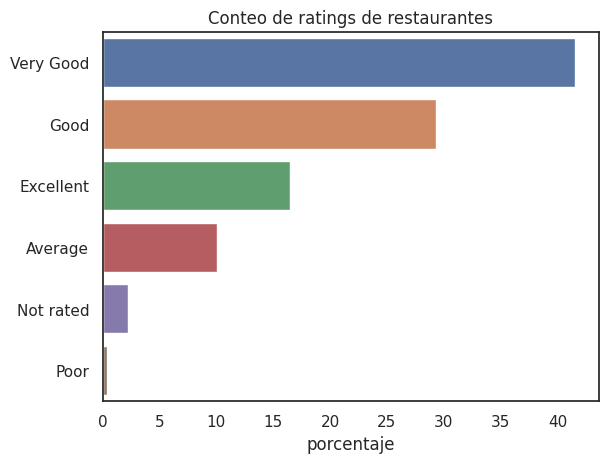

In [ ]:
ax = sns.barplot(y=as_percentages.index, x=as_percentages, orient='h')
ax.set_title("Conteo de ratings de restaurantes")
ax.set(xlabel="porcentaje")

In [ ]:
df['user_rating'].mode()

0    Very Good
Name: user_rating, dtype: object

## Ejemplo 03 - Tablas de contigencia

Precio vs. rating

Función de pandas: Crosstab

In [ ]:
pd.crosstab(df['price_range'], df['user_rating'])

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


In [ ]:
pd.crosstab(df['price_range'], df['user_rating'], margins=True, margins_name="Total")

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,Total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
Total,119,194,346,26,5,490,1180


In [ ]:
crosstab = pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']],margins=True, margins_name="Total")
crosstab

has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   
Total                   118       169  320        26    4       410       1   

has_online_delivery                               Total  
user_rating         Excellent Good Poor Very Good        
price_range                                              
1                           1    1    0         4    74  
2                           7   12    1        33   337  
3                          14    9    0        35   488  
4                           3    4    0         8   281  
Total                      25   26    1        80  1180

In [ ]:
crosstab.loc[1, (1, 'Excellent')]

1

In [ ]:
crosstab = pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']])
crosstab.stack(level=1)

has_online_delivery        0     1
price_range user_rating           
1           Average       12   0.0
            Excellent      8   1.0
            Good          32   1.0
            Not rated      1   NaN
            Poor           0   0.0
            Very Good     15   4.0
2           Average       47   0.0
            Excellent     30   7.0
            Good         104  12.0
            Not rated      3   NaN
            Poor           1   1.0
            Very Good     99  33.0
3           Average       40   1.0
            Excellent     70  14.0
            Good         132   9.0
            Not rated      3   NaN
            Poor           1   0.0
            Very Good    183  35.0
4           Average       19   0.0
            Excellent     61   3.0
            Good          52   4.0
            Not rated     19   NaN
            Poor           2   0.0
            Very Good    113   8.0